In [1]:
import torch
import torchvision
import gudhi as gd
from gudhi.wasserstein import wasserstein_distance

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import numpy as np
from copy import deepcopy
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt
%matplotlib inline

from ripser import lower_star_img
from ripser import Rips

import persim
import diagram2vec

import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn import functional as F

import gudhi as gd
from gudhi.wasserstein import wasserstein_distance as dist_w

from IPython.display import clear_output
import pandas as pd
from PIL import Image
import importlib

import utils
import datasets
importlib.reload(utils)
importlib.reload(datasets)
from utils import *
from datasets import *

POT (Python Optimal Transport) package is not installed. Try to run $ conda install -c conda-forge pot ; or $ pip install POT


In [30]:
def show_diagram(diagram):
    H0 = diagram[diagram[:, 2] == 0]
    H1 = diagram[diagram[:, 2] == 1]
    plt.scatter(H0[:, 0], H0[:, 1], c='r', label='H0')
    plt.scatter(H1[:, 0], H1[:, 1], c='b', label='H1')
    plt.legend()
    # set min and max for x and y axis
    plt.xlim(-0.5, 1)
    plt.ylim(-0.5, 1)
    # x - birth, y - death
    plt.xlabel('Birth')
    plt.ylabel('Death')
    # add line that goes from (-1, -1) to (1, 1)
    plt.plot([-1, 1], [-1, 1], c='black')
    plt.show()

## MNIST

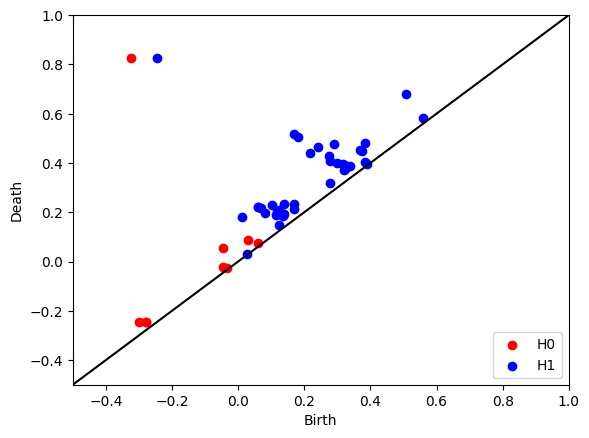

In [47]:
mnist_conv1 = torch.load('../data/mnist/1_conv_filter_train.pt')
img = mnist_conv1[0][0]
show_diagram(img)

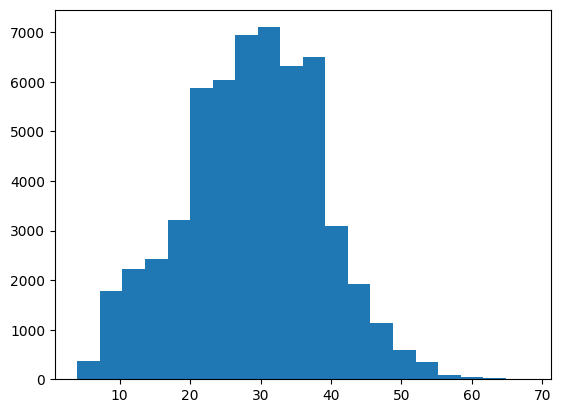

In [62]:
counts = []
for b in mnist_conv1:
    counts.append(b[0].shape[0])
plt.hist(counts, bins=20);

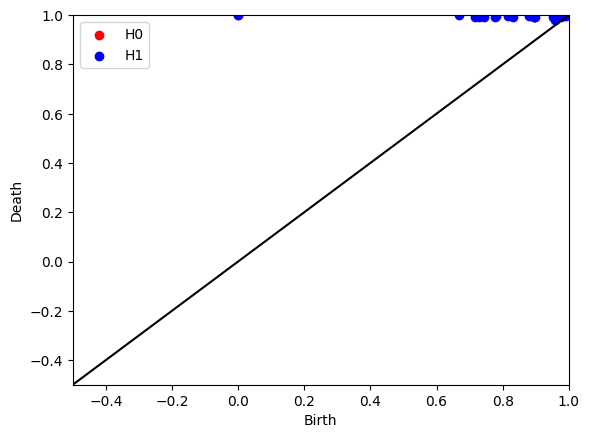

In [48]:
mnist_base = torch.load('../data/mnist/base_train.pt')
img = mnist_base[0][0]
show_diagram(img)

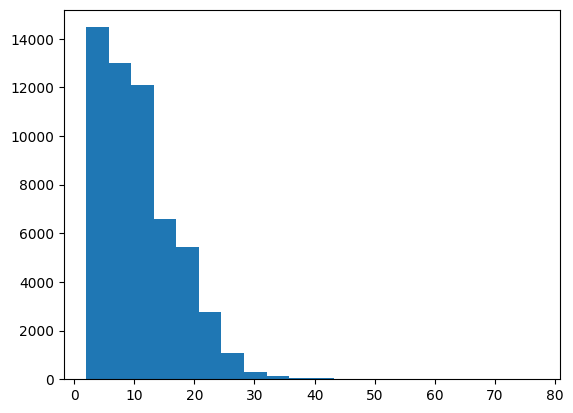

In [61]:
counts = []
for b in mnist_base:
    counts.append(b[0].shape[0])
plt.hist(counts, bins=20);

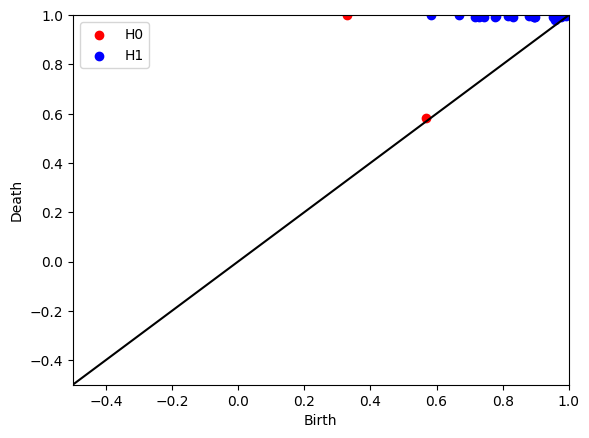

In [49]:
mnist_1_filter = torch.load('../data/mnist/1_dir_filter_train.pt')
img = mnist_1_filter[0][0]
show_diagram(img)

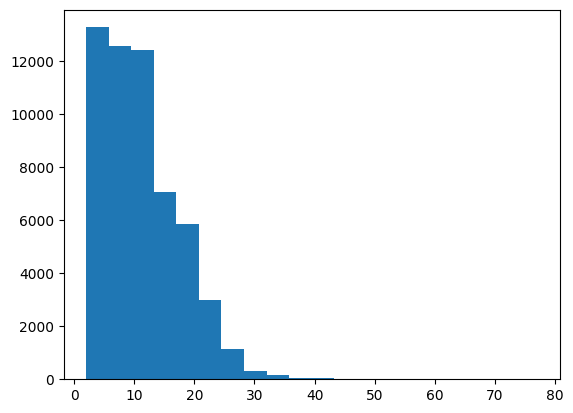

In [60]:
counts = []
for b in mnist_1_filter:
    counts.append(b[0].shape[0])
plt.hist(counts, bins=20);

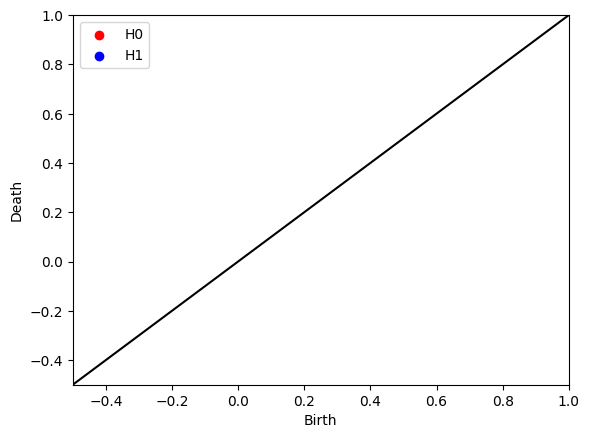

In [58]:
mnist_cedt = torch.load('../data/mnist/cedt_filter_train.pt')
img = mnist_cedt[1][0]
show_diagram(img)

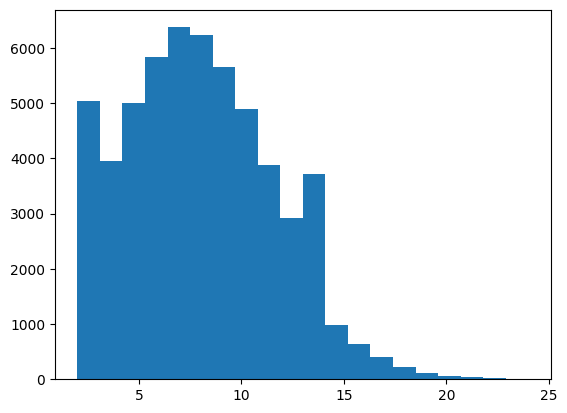

In [59]:
counts = []
for b in mnist_cedt:
    counts.append(b[0].shape[0])
plt.hist(counts, bins=20);

## CHINESE-MNIST

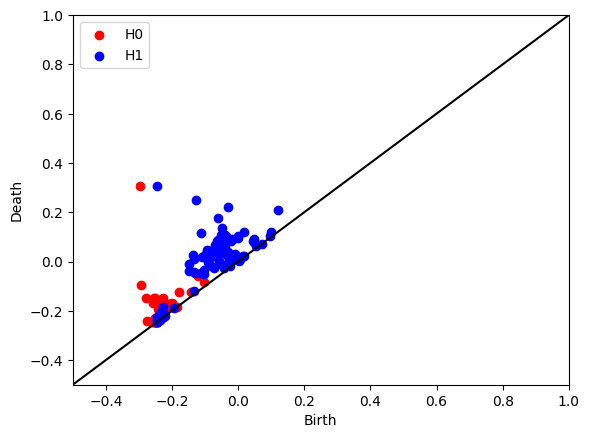

In [66]:
# conv
mnist_conv1 = torch.load('../data/chinese-mnist/1_conv_filter_train.pt')
img = mnist_conv1[0][0]
show_diagram(img)

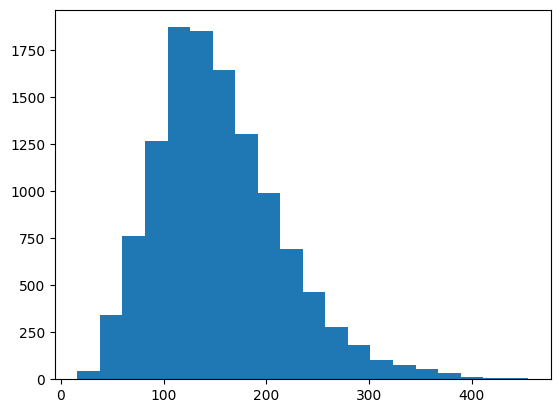

In [67]:
# hist
counts = []
for b in mnist_conv1:
    counts.append(b[0].shape[0])
plt.hist(counts, bins=20);

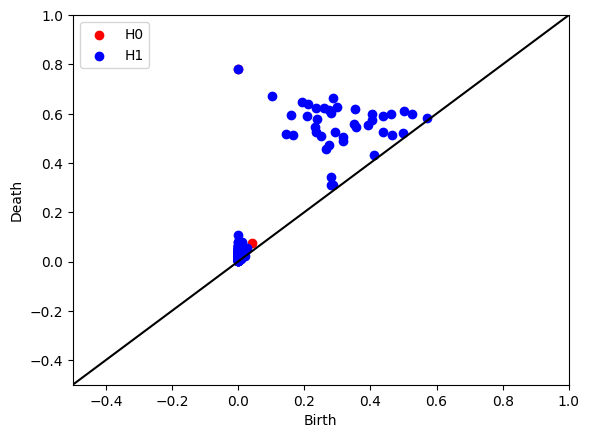

In [68]:
# base
mnist_base = torch.load('../data/chinese-mnist/base_train.pt')
img = mnist_base[0][0]
show_diagram(img)

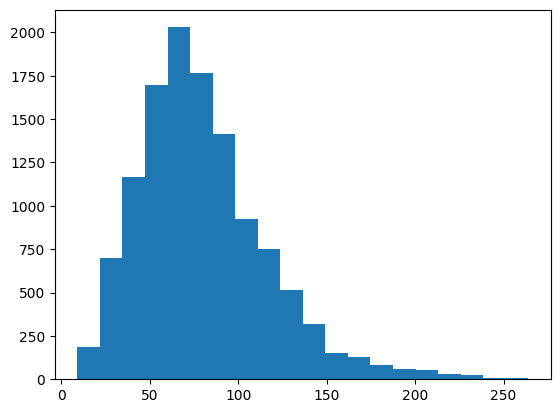

In [69]:
# hist
counts = []
for b in mnist_base:
    counts.append(b[0].shape[0])
plt.hist(counts, bins=20);

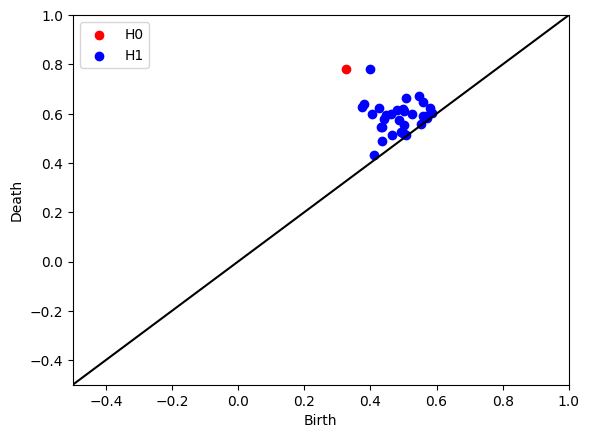

In [70]:
# 1 filter
mnist_1_filter = torch.load('../data/chinese-mnist/1_dir_filter_train.pt')
img = mnist_1_filter[0][0]
show_diagram(img)

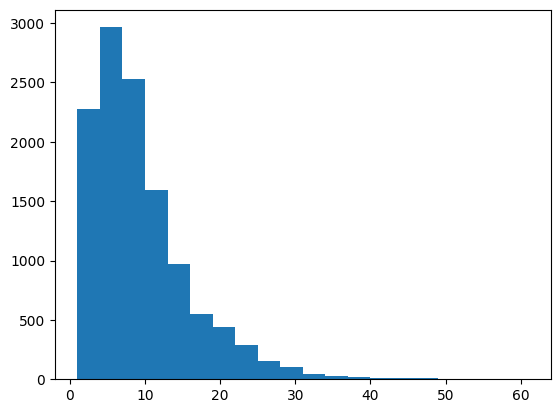

In [71]:
# hist
counts = []
for b in mnist_1_filter:
    counts.append(b[0].shape[0])
plt.hist(counts, bins=20);

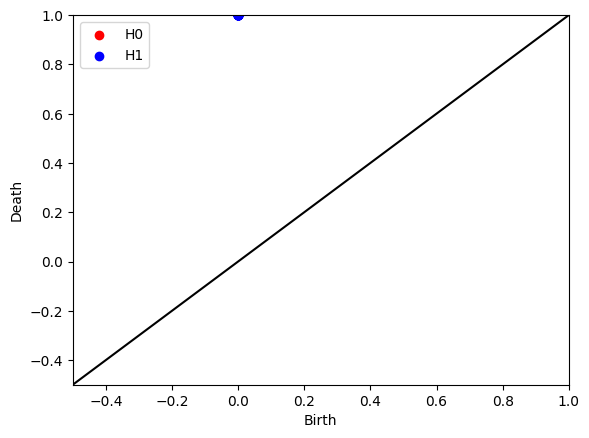

In [72]:
# cedt
mnist_cedt = torch.load('../data/chinese-mnist/cedt_filter_train.pt')
img = mnist_cedt[0][0]
show_diagram(img)

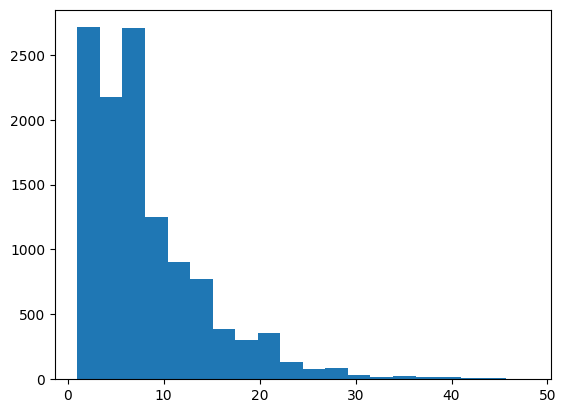

In [73]:
# hist
counts = []
for b in mnist_cedt:
    counts.append(b[0].shape[0])
plt.hist(counts, bins=20);